In [ ]:
%pip install psycopg2

In [ ]:
# @title 1. IMPORTA AS BIBLIOTECAS NECESSÁRIAS PARA A ANÁLISE EXPLORATÓRIA DE DADOS

import io
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import psycopg2 as ps2



In [ ]:
db_host = 'endereço no qual o banco de dados está hospedado'
db_port = 'porta do banco de dados'
db_name = 'nome do banco de dados'
db_user = 'nome do usuário'
db_password = 'senha do usuário'

In [ ]:
conexao = ps2.connect(
    host=db_host,
    port=db_port,
    dbname=db_name,
    user=db_user,
    password=db_password
)

In [ ]:
# @title 2.IMPORTA O ARQUIVO localizacao.csv PARA O DATAFRAME localizacao
localizacao = pd.read_csv('/localizacao.csv', sep=';', encoding='utf-8')



Visualizando tipos de dados da tabela localizacao.csv

In [ ]:
localizacao.info()

In [ ]:
# @title 3.VISUALIZA O ARQUIVO localizacao.csv IMPORTADO

localizacao




,Beat,Distrito
0,111,1
1,112,1
2,113,1
3,114,1
4,121,1
...,...,...
299,2531,25
300,2532,25
301,2533,25
302,2534,25


In [ ]:
# @title 4.Verificando se há nulo na tabela localização
localizacao.isnull().sum()

Beat        0
Distrito    0
dtype: int64

In [ ]:
# @title 5.Verificando o tipo de dado na tabela localização
localizacao.dtypes

Beat        int64
Distrito    int64
dtype: object

In [ ]:
# @title 6.Quantidade de beat por distrito

# Calcula a distribuição de frequência do campo beat(delegacia) por distrito  do dataframe df_pacientes
localizacao.groupby(['Distrito'])['Beat'].count()

# Primeira coluna é o número do distrito e a segunda, quantos beats tem nele





Distrito
1     12
2     24
3     13
4     12
5      9
6     12
7     15
8     15
9     15
10    12
11    15
12    24
14    12
15     9
16    18
17     9
18    12
19    24
20     9
22     9
24     9
25    15
Name: Beat, dtype: int64

In [ ]:
# @title 7.IMPORTA O ARQUIVO tipoCrime.csv PARA O DATAFRAME tipoCrime
tipoCrime = pd.read_csv('/tipoCrime.csv', sep=';', encoding='utf-8')



In [ ]:
# @title 8.VISUALIZA O ARQUIVO tipoCrime.csv IMPORTADO

tipoCrime




,IUCR,CategoriaCrime,DescricaoCrime,CodigoFBI
0,0110,HOMICIDE,FIRST DEGREE MURDER,01A
1,0130,HOMICIDE,SECOND DEGREE MURDER,01A
2,0141,HOMICIDE,INVOLUNTARY MANSLAUGHTER,01B
3,0142,HOMICIDE,RECKLESS HOMICIDE,01B
4,0261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,2
...,...,...,...,...
374,501A,OTHER OFFENSE,ANIMAL ABUSE / NEGLECT,26
375,501H,OTHER OFFENSE,HAZARDOUS MATERIALS VIOLATION,26
376,502P,OTHER OFFENSE,FALSE / STOLEN / ALTERED TRP,26
377,502R,OTHER OFFENSE,VEHICLE TITLE / REGISTRATION OFFENSE,26


In [ ]:
# @title 9.Verificando se há nulo na tabela tipocrime
tipoCrime.isnull().sum()

IUCR              0
CategoriaCrime    0
DescricaoCrime    0
CodigoFBI         0
dtype: int64

In [ ]:
# @title 10.Verificando o tipo de dado na tabela tipocrime
tipoCrime.dtypes

IUCR              object
CategoriaCrime    object
DescricaoCrime    object
CodigoFBI         object
dtype: object

In [ ]:
# @title 11.Verificando quantas categorias de crima há na tipocrime
tipoCrime['CategoriaCrime'].nunique()


30

In [ ]:
# @title 12.Verificando quais são as categorias de crime na tabela há na tipocrime
tipoCrime['CategoriaCrime'].unique()

array(['HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'BATTERY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ASSAULT', 'STALKING',
       'BURGLARY', 'THEFT', 'MOTOR VEHICLE THEFT', 'ARSON',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'OBSCENITY',
       'PUBLIC INDECENCY', 'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE',
       'GAMBLING', 'OTHER OFFENSE', 'KIDNAPPING', 'NARCOTICS',
       'OTHER NARCOTIC VIOLATION', 'LIQUOR LAW VIOLATION',
       'CRIMINAL ABORTION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'INTIMIDATION'], dtype=object)

In [ ]:
# @title 13.IMPORTA O ARQUIVO Casos.csv PARA O DATAFRAME casos
casos = pd.read_csv('/casos.csv', sep=',', encoding='utf-8')

Verificado tipo de dados da tabela casos.csv

In [ ]:
casos.dtypes

In [ ]:
casos

,IDCasos,NumeroCaso,Data,IUCR,DescricaoLocal,Prisao,Domestico,Beat,Ala,AreaComunitaria,DataUltimaAtualizacao,Latitude,Longitude,Local
0,12045583,JD226426,2020-05-07 10:24:00,0820,APARTMENT,False,False,212,3.0,35.0,2020-05-14 08:47:15,41.830482,-87.621752,"(41.830481843, -87.621751752)"
1,12031001,JD209965,2020-04-16 05:00:00,0460,APARTMENT,True,False,915,11.0,60.0,2020-04-23 15:45:11,41.836310,-87.639624,"(41.836310224, -87.639624112)"
2,12093529,JD282112,2020-07-01 10:16:00,051A,STREET,True,False,422,7.0,46.0,2020-07-08 15:41:45,41.747610,-87.549179,"(41.747609555, -87.549179329)"
3,12178140,JD381597,2020-09-27 23:29:00,0460,RESIDENCE - PORCH / HALLWAY,False,False,726,15.0,67.0,2020-10-04 15:43:55,41.774878,-87.671375,"(41.77487752, -87.671374872)"
4,4144897,HL474854,2005-07-10 15:00:00,0430,STREET,False,False,712,16.0,68.0,2018-02-28 15:56:25,41.781003,-87.652107,"(41.781002663, -87.652107119)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861660,4892807,HM506817,2006-07-21 00:01:00,1152,BANK,False,False,412,8.0,45.0,2018-02-10 15:50:01,41.737463,-87.585645,"(41.737462708, -87.585645433)"
861661,4810268,HM424702,2006-06-17 12:00:00,1305,RESIDENCE,False,False,1724,33.0,16.0,2018-02-28 15:56:25,41.955736,-87.711282,"(41.955735617, -87.711281884)"
861662,4890286,HM503851,2006-07-27 23:41:59,0460,RESIDENCE PORCH/HALLWAY,False,False,1511,29.0,25.0,2018-02-10 15:50:01,41.900722,-87.769248,"(41.900722387, -87.769247809)"
861663,4879280,HM493177,2006-07-23 02:30:00,4387,STREET,True,True,1522,28.0,25.0,2021-09-07 15:41:02,41.880334,-87.757959,"(41.880334264, -87.757959152)"


In [ ]:
# @title 14.Verificar se existem IDs repetidos

# Verifique se existem IDs repetidos

duplicados = casos[casos['IDCasos'].duplicated(keep=False)]

if duplicados.empty:
    print("Não existem IDs repetidos na tabela.")
else:
    print("IDs repetidos na tabela:")
    print(duplicados)

# Verifique se os IDs são únicos para cada crime
if casos['IDCasos'].nunique() == len(casos):
    print("Cada ID é único para cada crime.")
else:
    print("IDs não são únicos para cada crime.")



Não existem IDs repetidos na tabela.
Cada ID é único para cada crime.


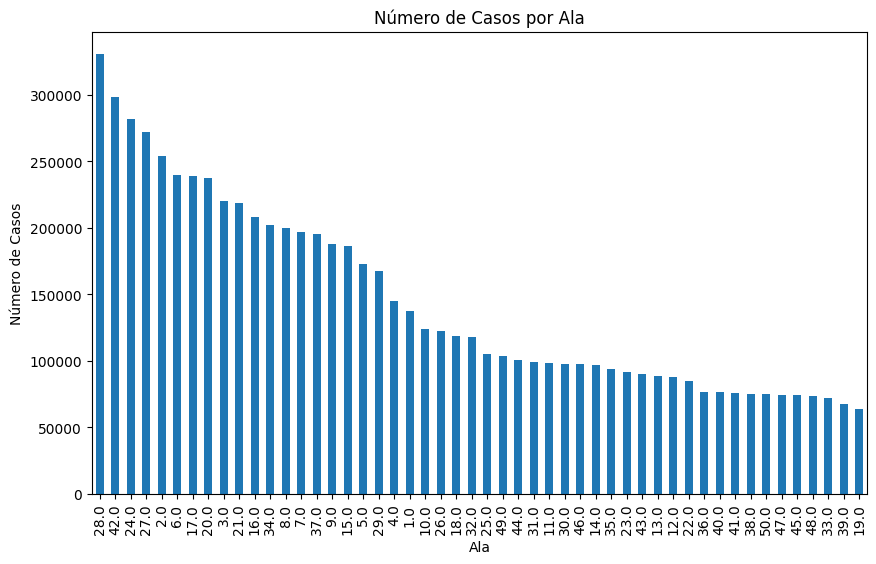

In [ ]:
# @title 15.Verificando a quantidade de Casos por Ala

# Agrupe os dados pela coluna 'Ala' e conte a ocorrência de cada valor
contagem_ala = casos['Ala'].value_counts()

# Crie o gráfico de coluna
contagem_ala.plot(kind='bar', figsize=(10, 6))

# Adicione rótulos aos eixos e um título
plt.xlabel('Ala')
plt.ylabel('Número de Casos')
plt.title('Número de Casos por Ala')

# Exiba o gráfico
plt.show()

In [ ]:
# @title 16.Verificando a quantidade de Casos por Area Comunitaria

# Agrupe os dados pela coluna 'Ala' e conte a ocorrência de cada valor
contagem_AreaComunitaria = casos['AreaComunitaria'].hist()

# # Crie o gráfico de coluna
# contagem_AreaComunitaria.plot(kind='bar', figsize=(10, 6))

# Adicione rótulos aos eixos e um título
plt.xlabel('AreaComunitaria')
plt.ylabel('Número de Casos')
plt.title('Número de Casos por Ala')

# Exiba o gráfico
plt.show()

NameError: ignored

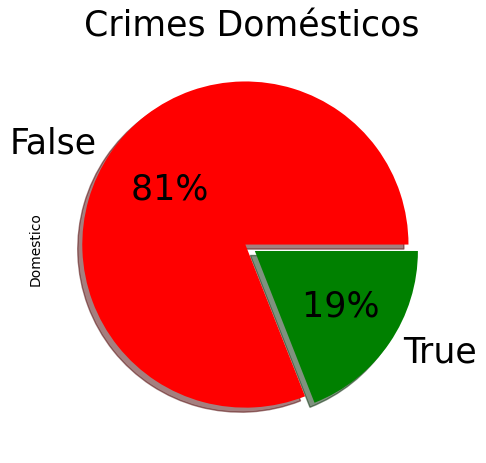

In [ ]:
contagem_domestico = casos['Domestico'].value_counts()
contagem_domestico.plot(kind='pie',figsize=(5,5),autopct="%3.0f%%",colors=['red','green'],shadow=True,fontsize=25,explode=[0.05,.02])

plt.title('Crimes Domésticos',fontsize=25)

plt.tight_layout()

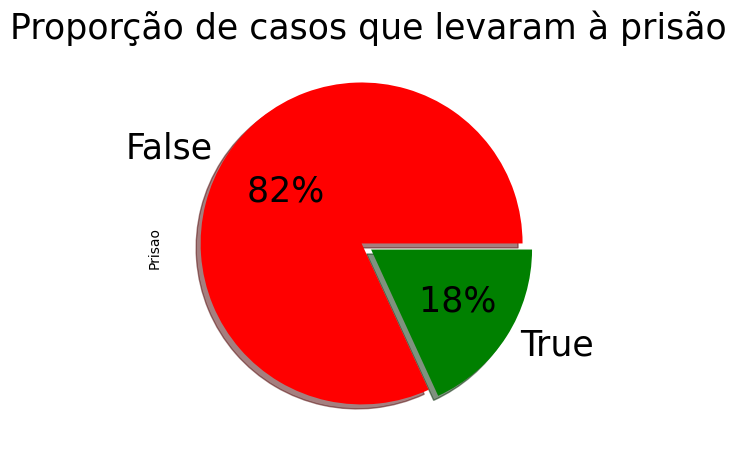

In [ ]:
contagem_prisao = casos['Prisao'].value_counts()
contagem_prisao.plot(kind='pie',figsize=(5,5),autopct="%3.0f%%",colors=['red','green'],shadow=True,fontsize=25,explode=[0.05,.02])

plt.title('Proporção de casos que levaram à prisão',fontsize=25)

plt.tight_layout()

Na tabela **Localização**, há a coluna *beat*. *Beat* é um território da cidade que um agente da polícia está incumbido de patrulhar. Abaixo, temos um mapa dos beats de Chicago.

fonte (geoJSON): https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Beats-current-/aerh-rz74

tutorial: https://medium.com/@h4k1m0u/plot-a-geojson-map-using-geopandas-be89e7a0b93b

In [ ]:
#importando bibliotecas necessárias
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona

In [ ]:
#carregando o arquivo do mapa
mapa_beats = gpd.read_file('https://data.cityofchicago.org/api/geospatial/aerh-rz74?method=export&format=GeoJSON')

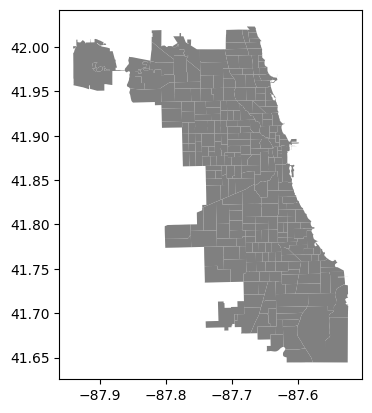

In [ ]:
ax = mapa_beats.plot(color='gray')

Na tabela **Localização** também temos a coluna *distrito*. Abaixo, temos um mapa dos distritos de Chicago.

fonte: https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r

In [ ]:
#carregando o arquivo do mapa
mapa_distritos = gpd.read_file('https://data.cityofchicago.org/api/geospatial/fthy-xz3r?method=export&format=GeoJSON')

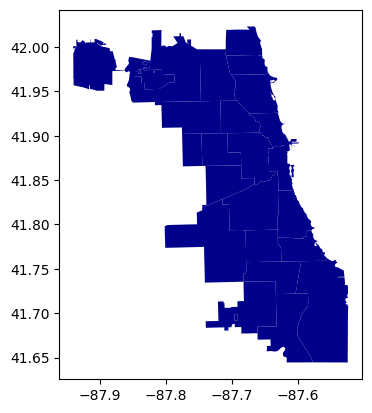

In [ ]:
ax = mapa_distritos.plot(color='darkblue')

Na tabela **Casos** temos a coluna *ala*. Alas são um tipo de divisão administrativa e legislativa de uma cidade. Abaixo, temos um mapa das alas de Chicago.




In [ ]:
#carregando o arquivo do mapa
mapa_alas = gpd.read_file('https://data.cityofchicago.org/resource/p293-wvbd.geojson')

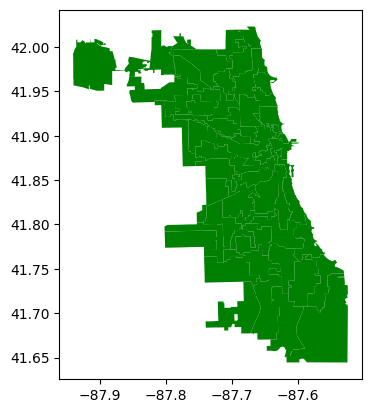

In [ ]:
ax = mapa_alas.plot(color='green')

Na tabela **Casos** também temos a coluna *AreaComunitaria*. Áreas comunitárias também são um tipo de divisão administrativa de uma cidade.

Abaixo, temos um mapa das áreas comunitárias de Chicago. A cidade é dividida em 77 áreas comunitárias.


In [ ]:
#carregando o arquivo do mapa
mapa_areas_comunitarias = gpd.read_file('https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=GeoJSON')

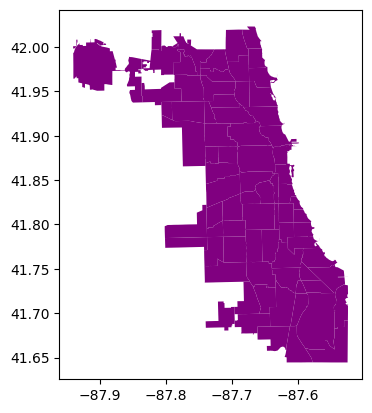

In [ ]:
ax = mapa_areas_comunitarias.plot(color='purple')

Tipos de crimes mais frequentes

In [ ]:
casos_joins_tipoCrime = casos.merge(tipoCrime, left_on='IUCR', right_on='IUCR')

In [ ]:
casos_joins_tipoCrime

,IDCasos,NumeroCaso,Data,IUCR,DescricaoLocal,Prisao,Domestico,Beat,Ala,AreaComunitaria,DataUltimaAtualizacao,Latitude,Longitude,Local,CategoriaCrime,DescricaoCrime,CodigoFBI
0,12045583,JD226426,2020-05-07 10:24:00,0820,APARTMENT,False,False,212,3.0,35.0,2020-05-14 08:47:15,41.830482,-87.621752,"(41.830481843, -87.621751752)",THEFT,$500 AND UNDER,6
1,12067286,JD251718,2020-06-02 22:00:00,0820,STREET,True,False,925,11.0,61.0,2020-06-09 15:43:29,41.817138,-87.644538,"(41.817138145, -87.644537728)",THEFT,$500 AND UNDER,6
2,12134824,JD331452,2020-08-07 21:00:00,0820,APARTMENT,False,False,1614,41.0,76.0,2020-08-16 15:40:33,41.970934,-87.839697,"(41.97093409, -87.839696517)",THEFT,$500 AND UNDER,6
3,12142104,JD338656,2020-08-19 21:45:00,0820,STREET,False,False,1225,28.0,28.0,2020-08-26 15:42:14,41.873220,-87.675869,"(41.873219626, -87.675868666)",THEFT,$500 AND UNDER,6
4,12025295,JD203697,2020-04-05 13:00:00,0820,STREET,False,False,726,15.0,67.0,2020-04-12 15:41:31,41.777006,-87.670231,"(41.777005986, -87.670231127)",THEFT,$500 AND UNDER,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838739,4551242,HL731218,2005-11-12 13:15:00,1610,STREET,True,False,2513,36.0,25.0,2018-02-10 15:50:01,41.908971,-87.798892,"(41.908970668, -87.798892191)",GAMBLING,BOOKMAKING / HORSES,19
838740,4622209,HM215603,2006-03-05 21:30:00,1230,OTHER,False,False,711,16.0,68.0,2018-02-28 15:56:25,41.783869,-87.644890,"(41.78386859, -87.644890262)",DECEPTIVE PRACTICE,POSSESS KEYS OR DEVICE TO COIN MACHINE,11
838741,4650306,HM248880,2006-03-23 17:30:00,0490,HOTEL/MOTEL,False,False,1834,42.0,8.0,2018-02-10 15:50:01,41.889561,-87.620197,"(41.889561428, -87.620196651)",RITUALISM,AGGRAVATED RITUAL MUTILATION - HANDGUN,04B
838742,4547646,HL788228,2005-12-14 03:02:30,1526,STREET,True,False,2532,37.0,25.0,2018-02-28 15:56:25,41.909461,-87.758848,"(41.909460624, -87.758847562)",PROSTITUTION,PATRONIZING A JUVENILE PROSTITUTE,16


In [ ]:
#Pandas Equivalent
res=casos_joins_tipoCrime.groupby('CategoriaCrime')['CategoriaCrime'].agg('count').sort_values(ascending=False).head(10)
res

CategoriaCrime
THEFT                  175121
BATTERY                158350
CRIMINAL DAMAGE        104785
ASSAULT                 69893
MOTOR VEHICLE THEFT     59025
OTHER OFFENSE           52401
NARCOTICS               45277
BURGLARY                35088
ROBBERY                 31984
DECEPTIVE PRACTICE      31202
Name: CategoriaCrime, dtype: int64

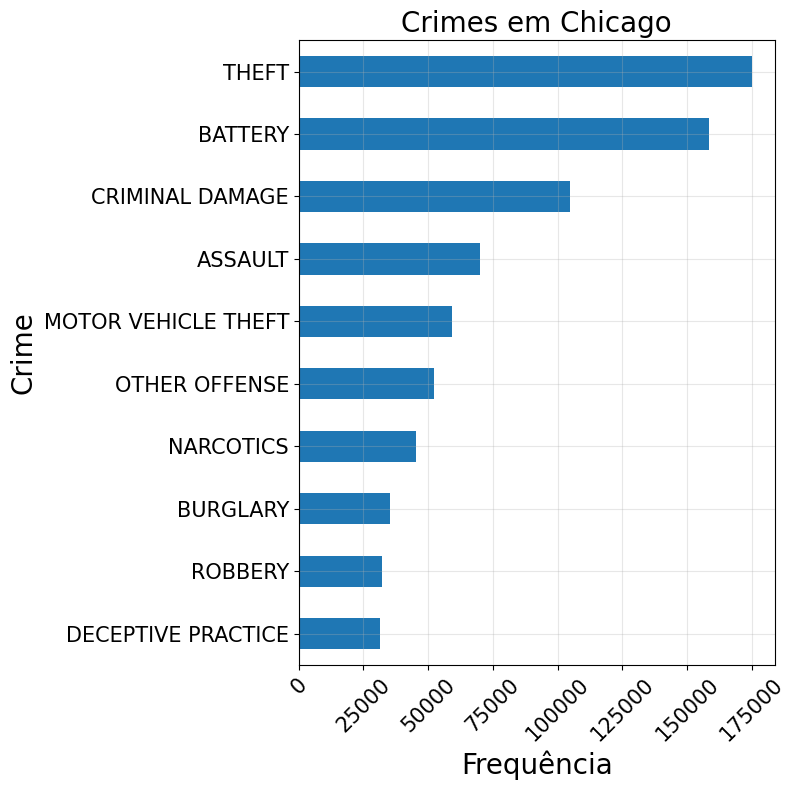

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
res[::-1].plot(kind='barh')
plt.xlabel('Frequência',fontsize=20)
plt.ylabel('Crime',fontsize=20)
plt.title('Crimes em Chicago',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True,alpha=0.3)
plt.tight_layout()

Áreas comunitárias mais seguras

In [ ]:
crime1=casos[casos['AreaComunitaria'].notna()]
areas_mais_seguras = crime1.groupby(by='AreaComunitaria')['AreaComunitaria'].agg('count').sort_values().head()
areas_mais_seguras

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
areas_mais_seguras[::-1].plot(kind='barh')
plt.xlabel('Frequência',fontsize=20)
plt.ylabel('Área Comunitária',fontsize=20)
plt.title('Áreas mais seguras em Chicago',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True,alpha=0.3)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(11,5))
casos.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2005 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()